# -: BASE BALL CASE STUDY PROJECT :-  
  
  
  Project Description:-
  
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.  
  
   
   -- Input features-
 1.  W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
 
2. R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.

3.AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.

4.H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.

5.2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.

6.3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.

7.HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

8.BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base

9.SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.

10.SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.

11.RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.

12.ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.

13.ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.

14.CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.

15.SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.

16.SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.

17.E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

     PREDICT=Number of Wins(W)
   
   


In [72]:
#Import necessery libraries 
import pandas as pd
import numpy as np
#To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
#For prevent Warnings
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [73]:
# To Avoid finding file path error
file_path = 'baseball.csv'
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print(f"The file {file_path} does not exist.")


In [74]:
#data loading

ball=pd.read_csv('baseball.csv')
ball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [75]:
ball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### Data preprocessing 

In [76]:
ball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [77]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [78]:
ball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [79]:
ball.duplicated().sum()

0

In [80]:
ball.shape

(30, 17)

OBSERVATIONS ...

This dataset has  no NuLL values,no duplicate values and it has 30*17 dimension

In [81]:
ball.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


In [82]:
ball.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

## EDA 

<Axes: >

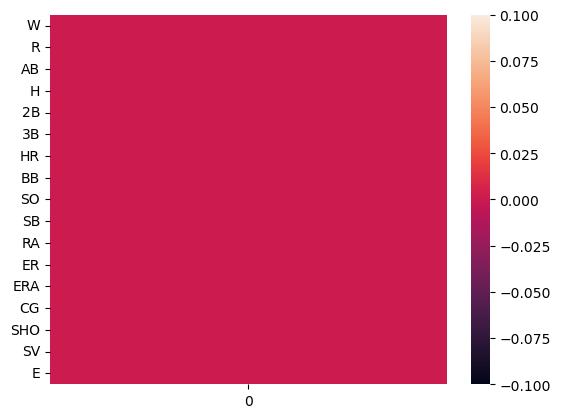

In [83]:
sns.heatmap(ball.isnull().sum().to_frame())

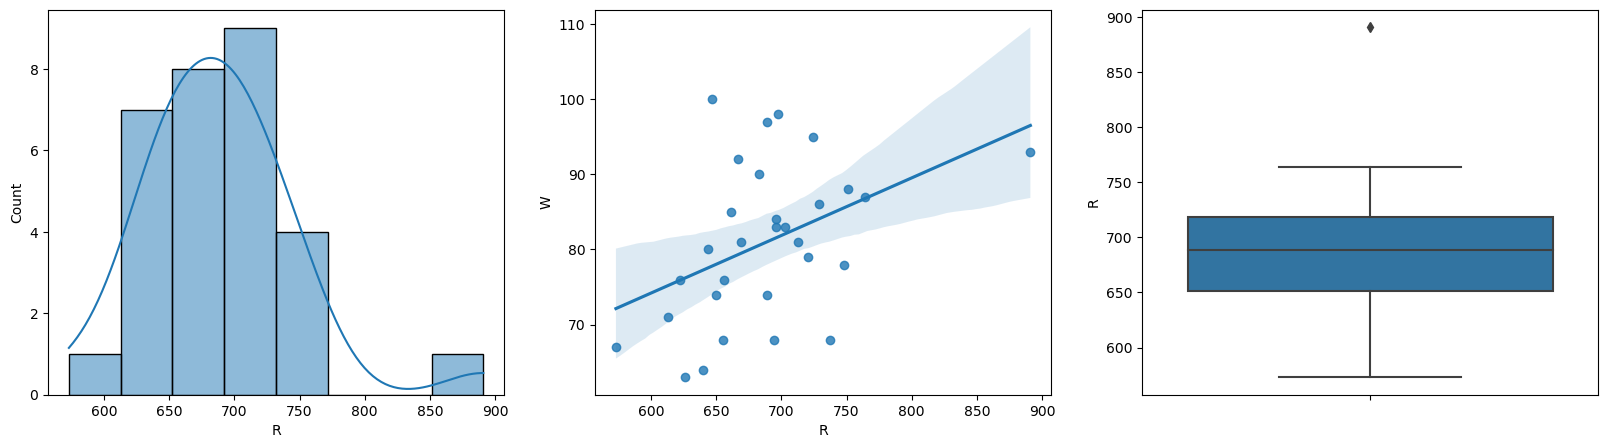

In [84]:
# visualize the distribution of continuous features
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='R',data=ball,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='R',y='W',data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='R',data=ball)
plt.show()

Run and win are linearly correlated. And outliers are present between 850 and 900



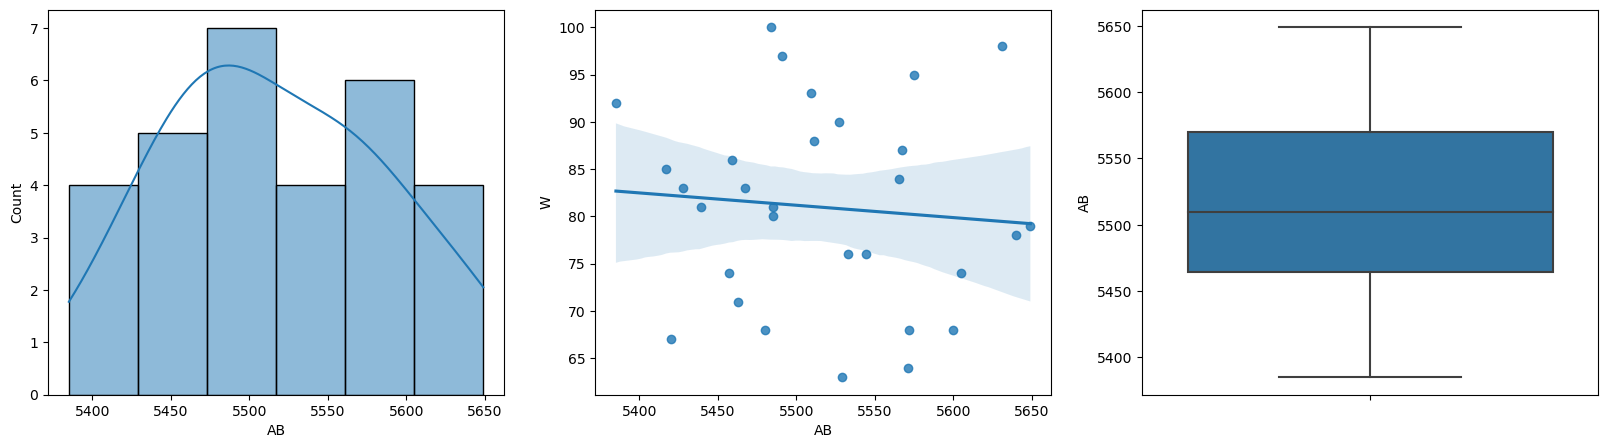

In [85]:

plt.figure(figsize=(20,5))
    
plt.subplot(1,3,1)

sns.histplot(x='AB',data=ball,kde=True)

plt.subplot(1,3,2)

sns.regplot(x='AB',y='W',data=ball)

plt.subplot(1,3,3)

sns.boxplot(y='AB',data=ball)

plt.show()

At balls is very weekly related to Wins With no outliers.



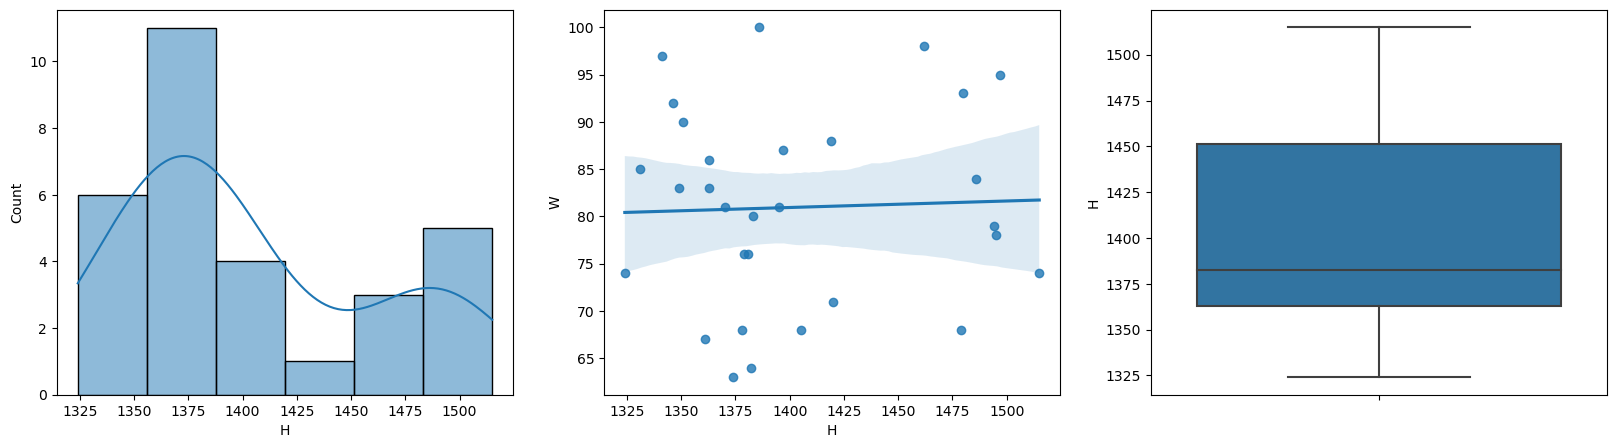

In [86]:

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='H',data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='H', y='W',data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='H',data=ball)
plt.show()

Hits are also very weekly related to winning.



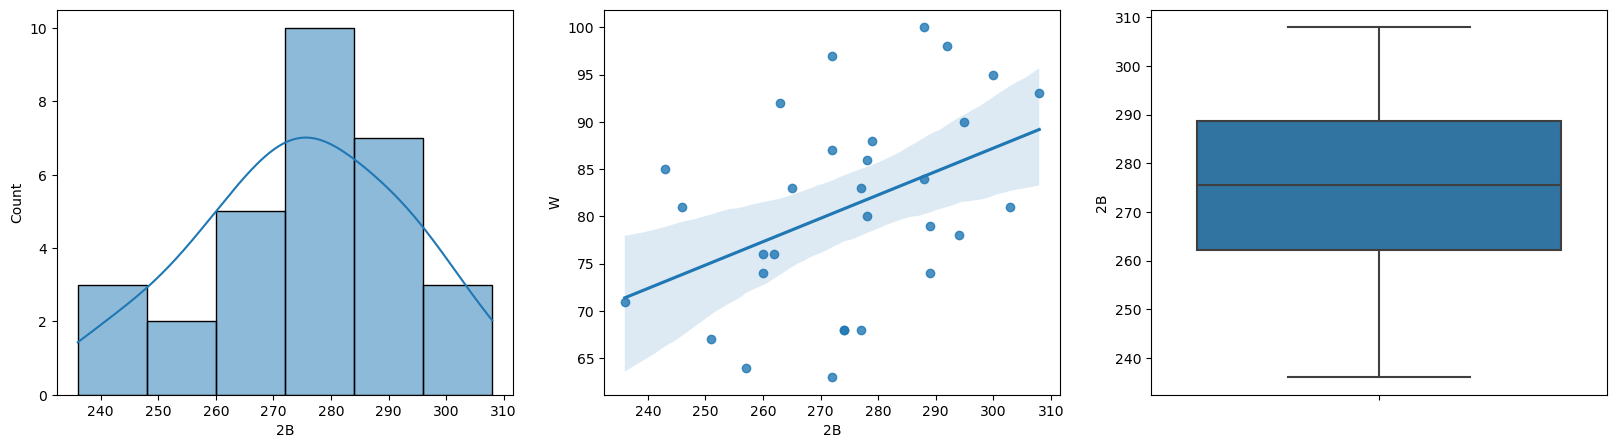

In [87]:

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='2B', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='2B', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='2B',  data=ball)
plt.show()

Doubles are linearly related with Wins and data is left-skewed 

<Axes: xlabel='3B', ylabel='W'>

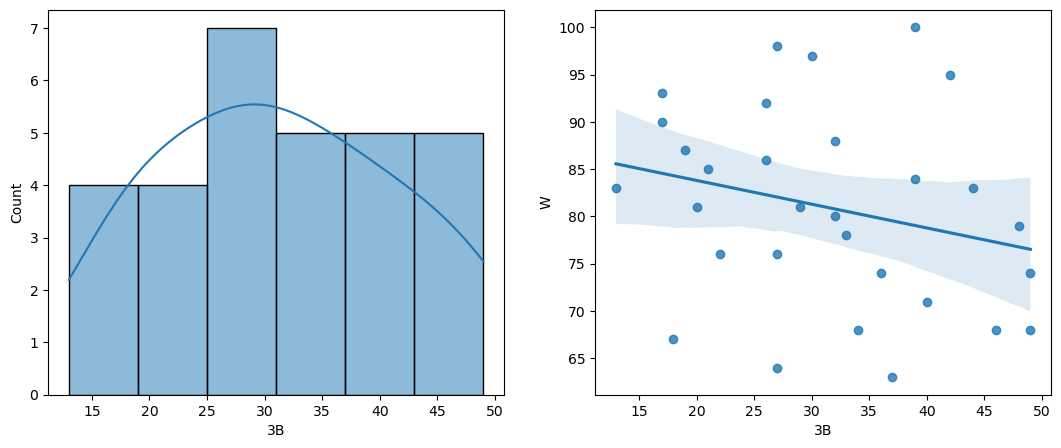

In [88]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='3B', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='3B', y='W', data=ball)


Triple has very weak negative correlations with win.



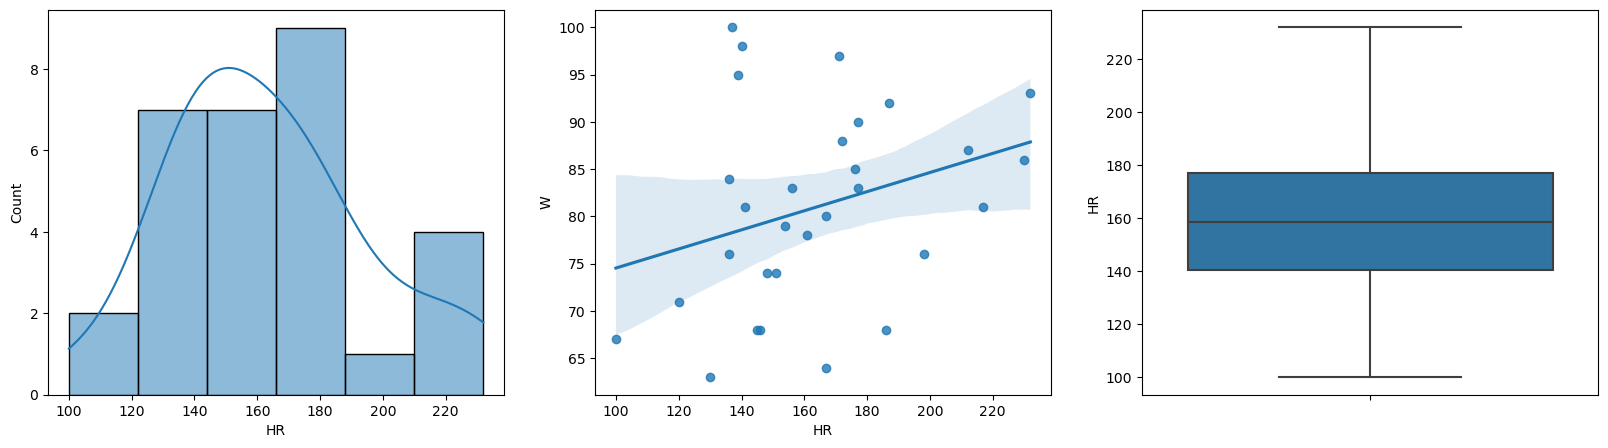

In [89]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='HR', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='HR', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='HR',  data=ball)
plt.show()

The home run has a very low correlation with wins  and data is right-skewed



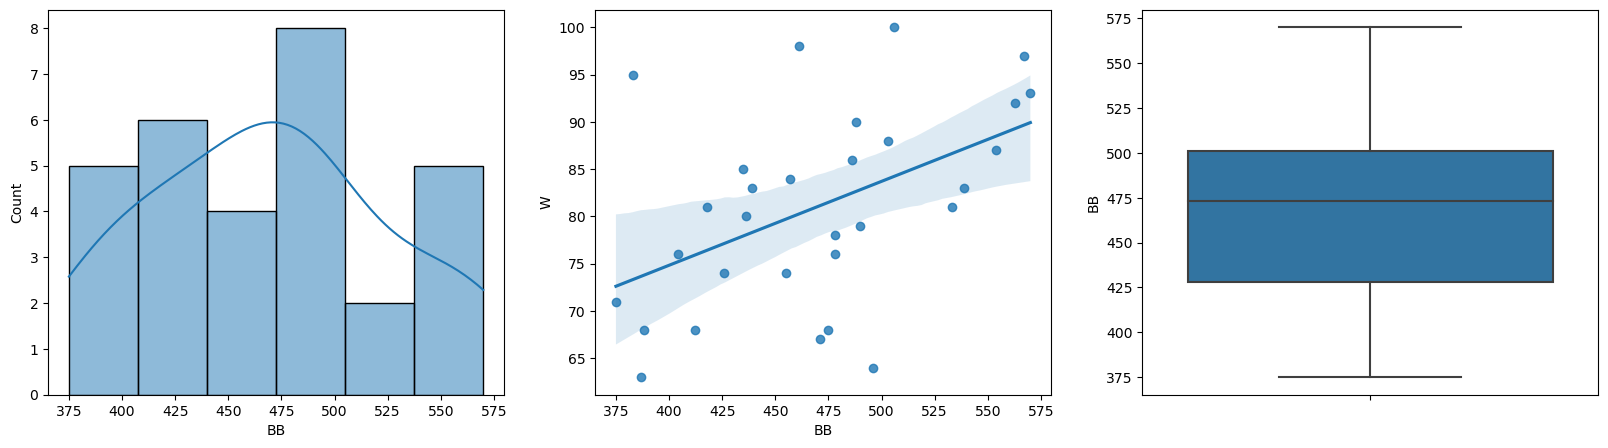

In [90]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='BB', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='BB', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='BB',  data=ball)
plt.show()

Walk/Base on balls is lightly correlated to win with no outlier

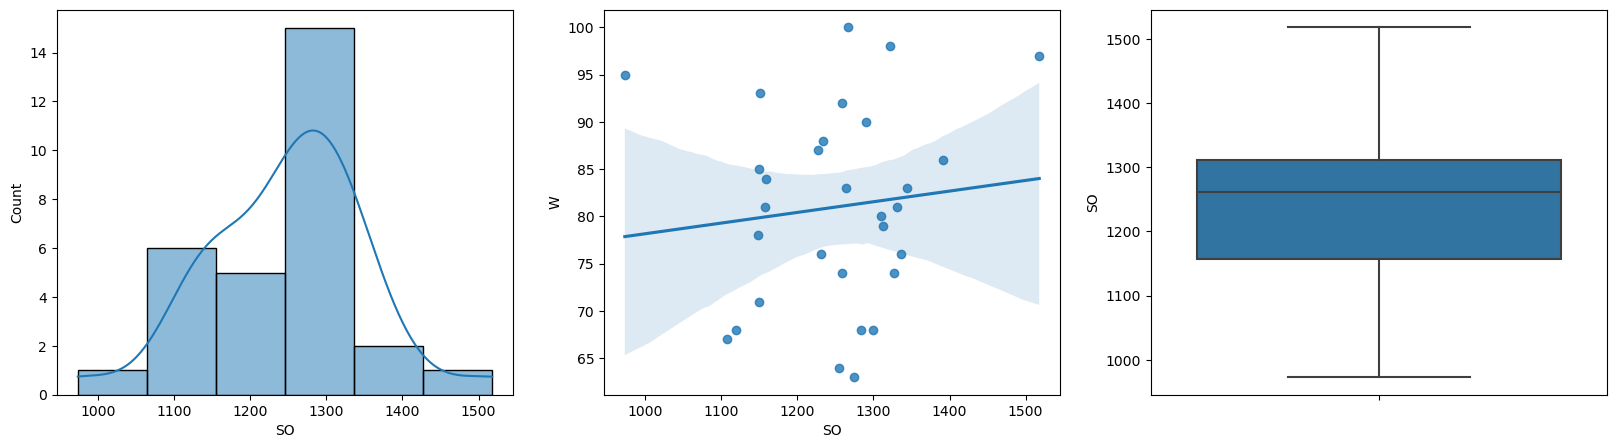

In [91]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SO', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='SO', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='SO',  data=ball)
plt.show()

Strikeout is not correlated to win with no outlier and the dataset is left-skewed.



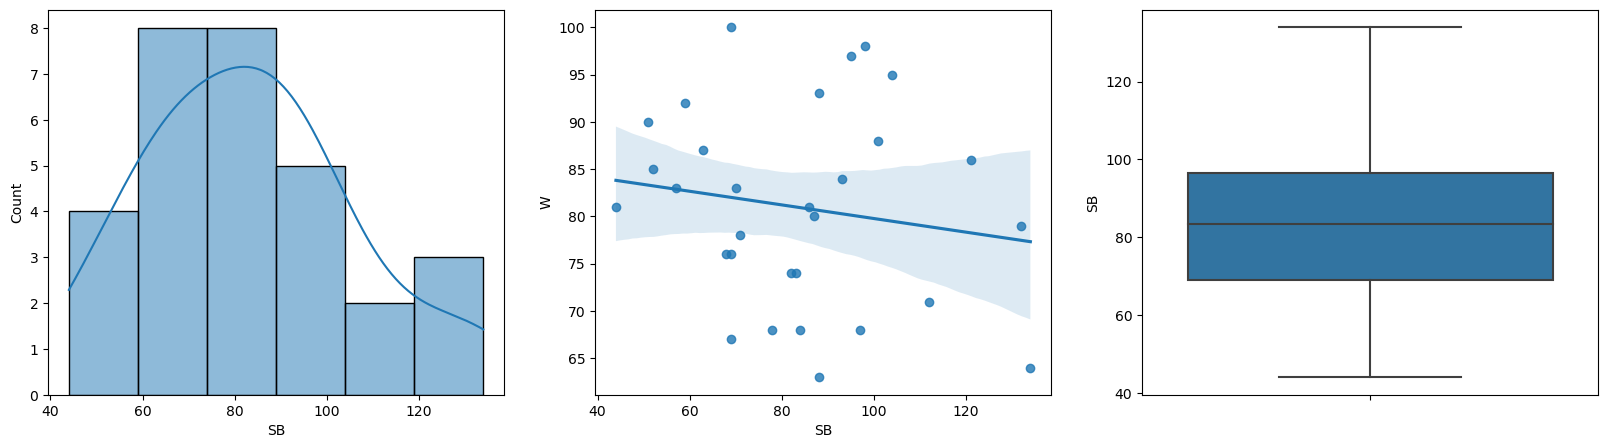

In [92]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SB', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='SB', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='SB',  data=ball)
plt.show()

Stolen Bases is not correlated to win 



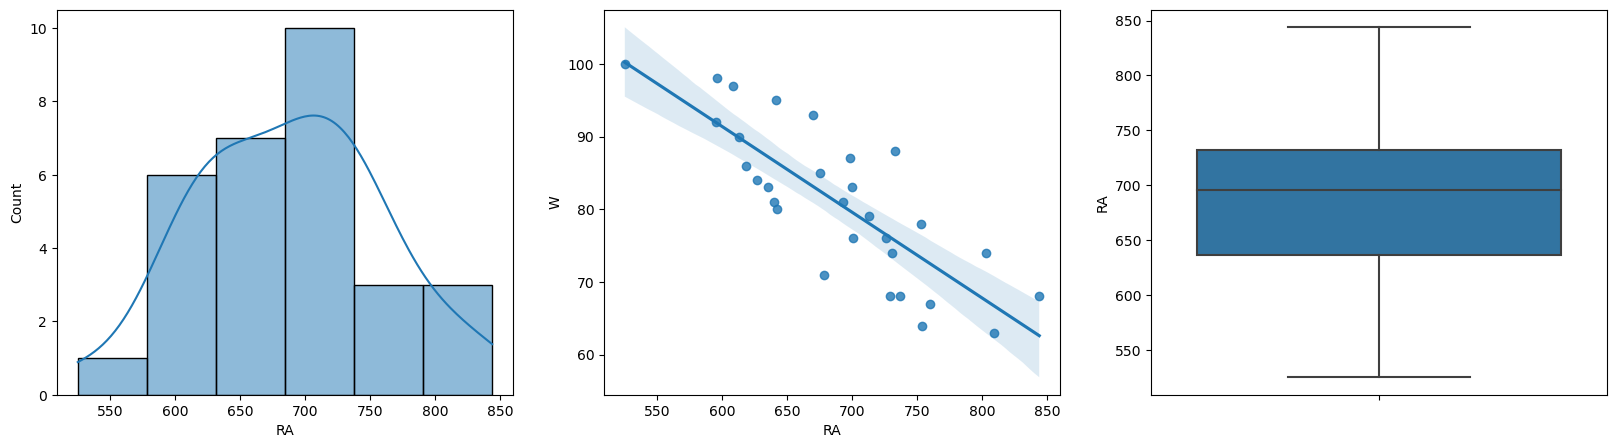

In [93]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='RA', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='RA', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='RA',  data=ball)
plt.show()

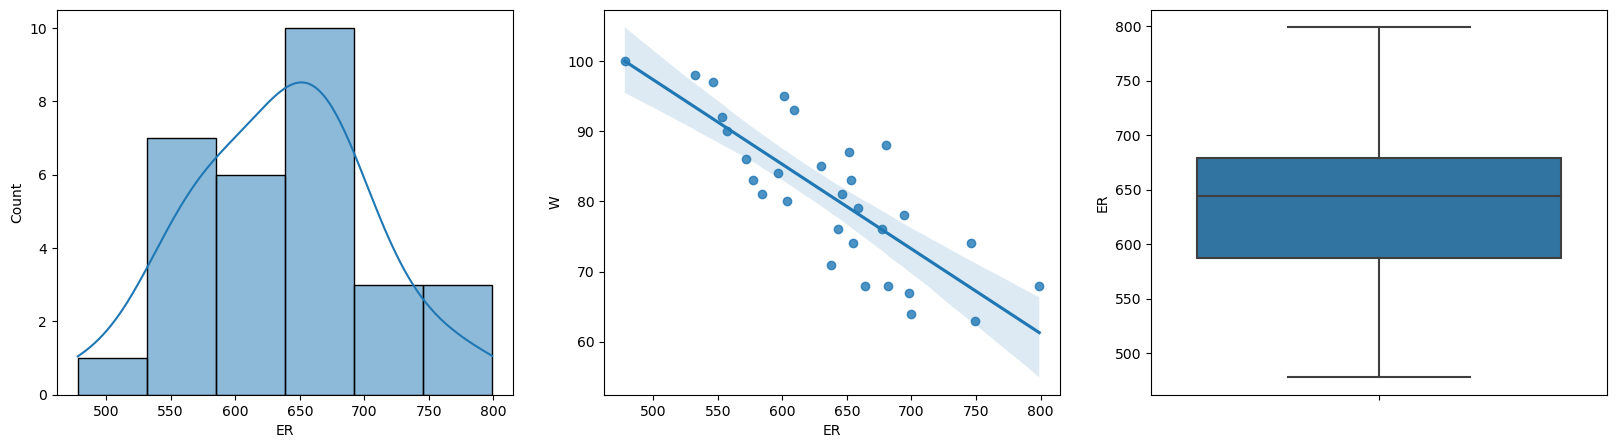

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ER', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='ER', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='ER',  data=ball)
plt.show()

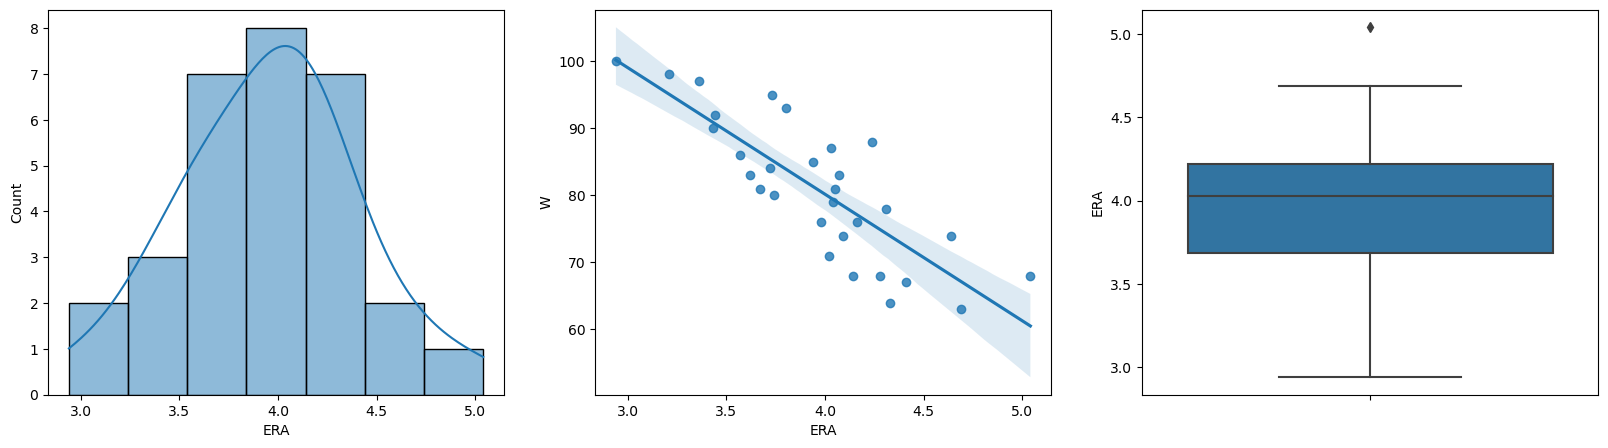

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ERA', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='ERA', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='ERA',  data=ball)
plt.show()

Earned Runs is highly correlated to win 



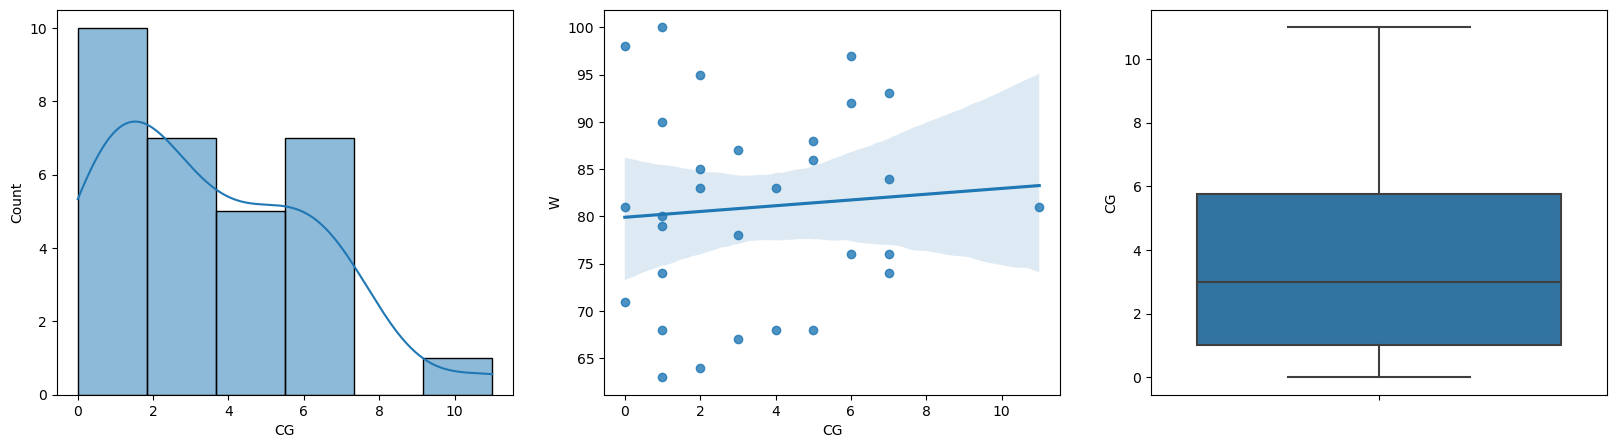

In [96]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='CG', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='CG', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='CG',  data=ball)
plt.show()

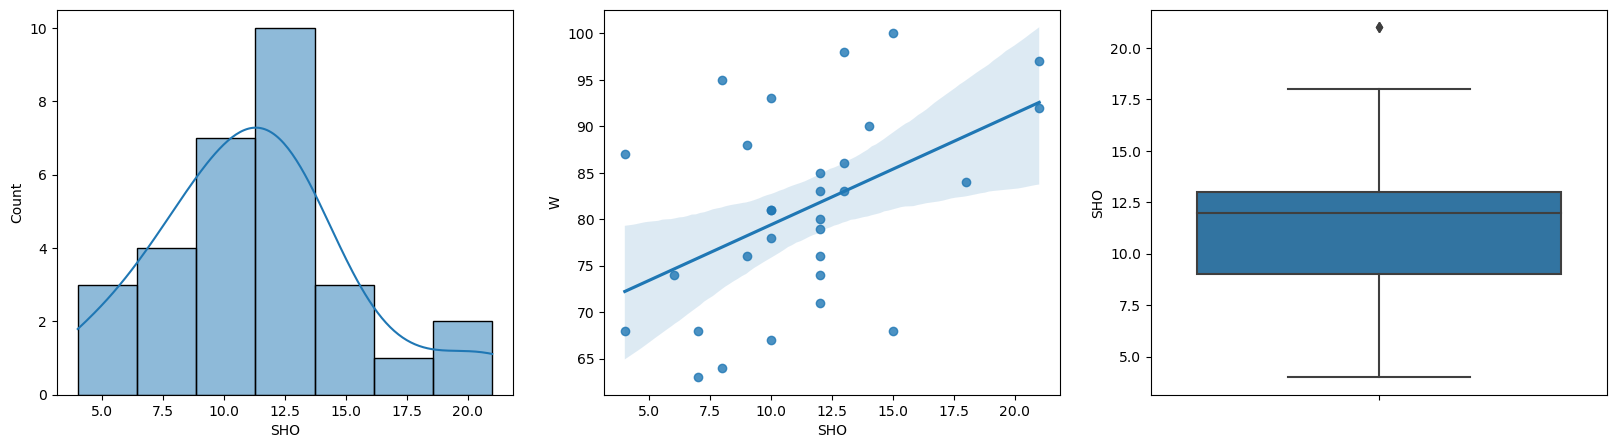

In [97]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SHO', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='SHO', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='SHO',  data=ball)
plt.show()

Shutouts are highly correlated to win  and data is right-skewed.

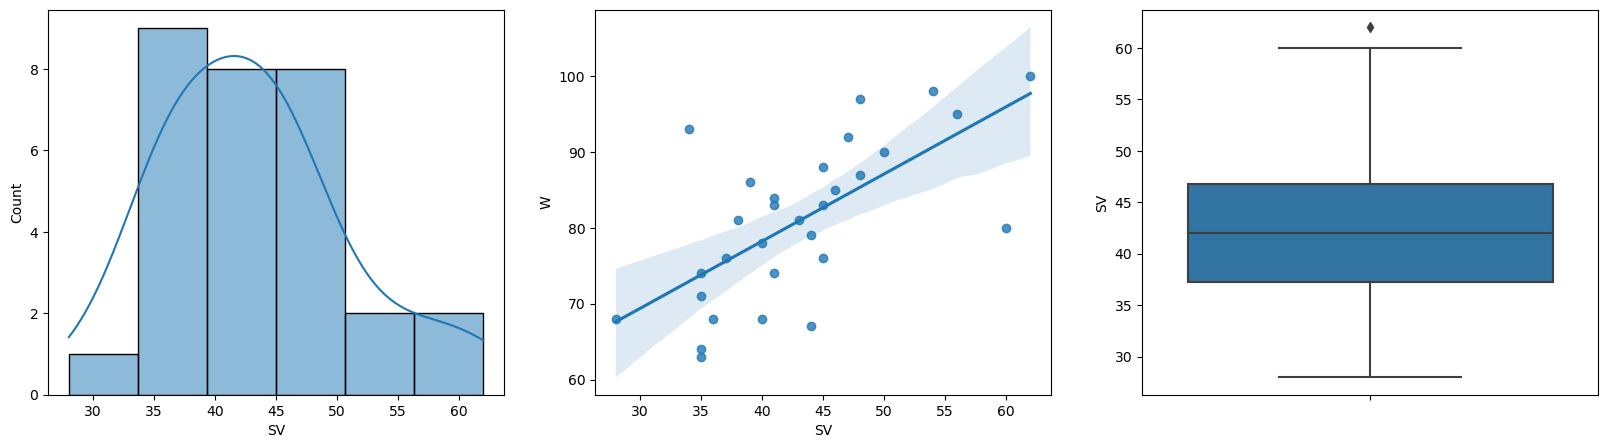

In [98]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SV', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='SV', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='SV',  data=ball)
plt.show()

Saves are lightly correlated to win with no outliers-skewed.

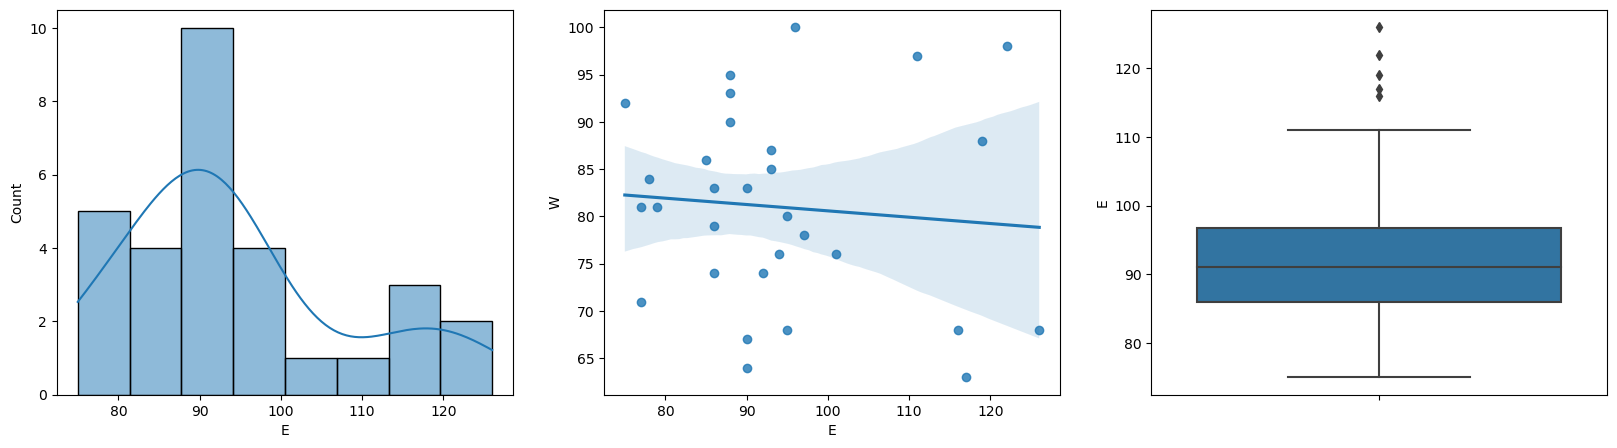

In [99]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='E', data=ball,kde=True)
plt.subplot(1, 3, 2)
sns.regplot(x='E', y='W', data=ball)
plt.subplot(1,3,3)
sns.boxplot(y='E',  data=ball)
plt.show()

Errors are not correlated to win, the data has outliers and data is right-skewed.

OBSERVATIONS ...

The number of runs, home runs, doubles, Saves, Shutouts, and Walks are highly positively linearly correlated.

Stolen Bases, Runs Allowed, Earned Runs are highly negative linearly correlated.

The remaining features have less to no linear correlation with no of Wins

In [100]:
ball2=ball.copy()
label=LabelEncoder()
for x in ball2.select_dtypes(include='object').columns:
    ball2[x]=label.fit_transform(ball2[x])
ball2.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


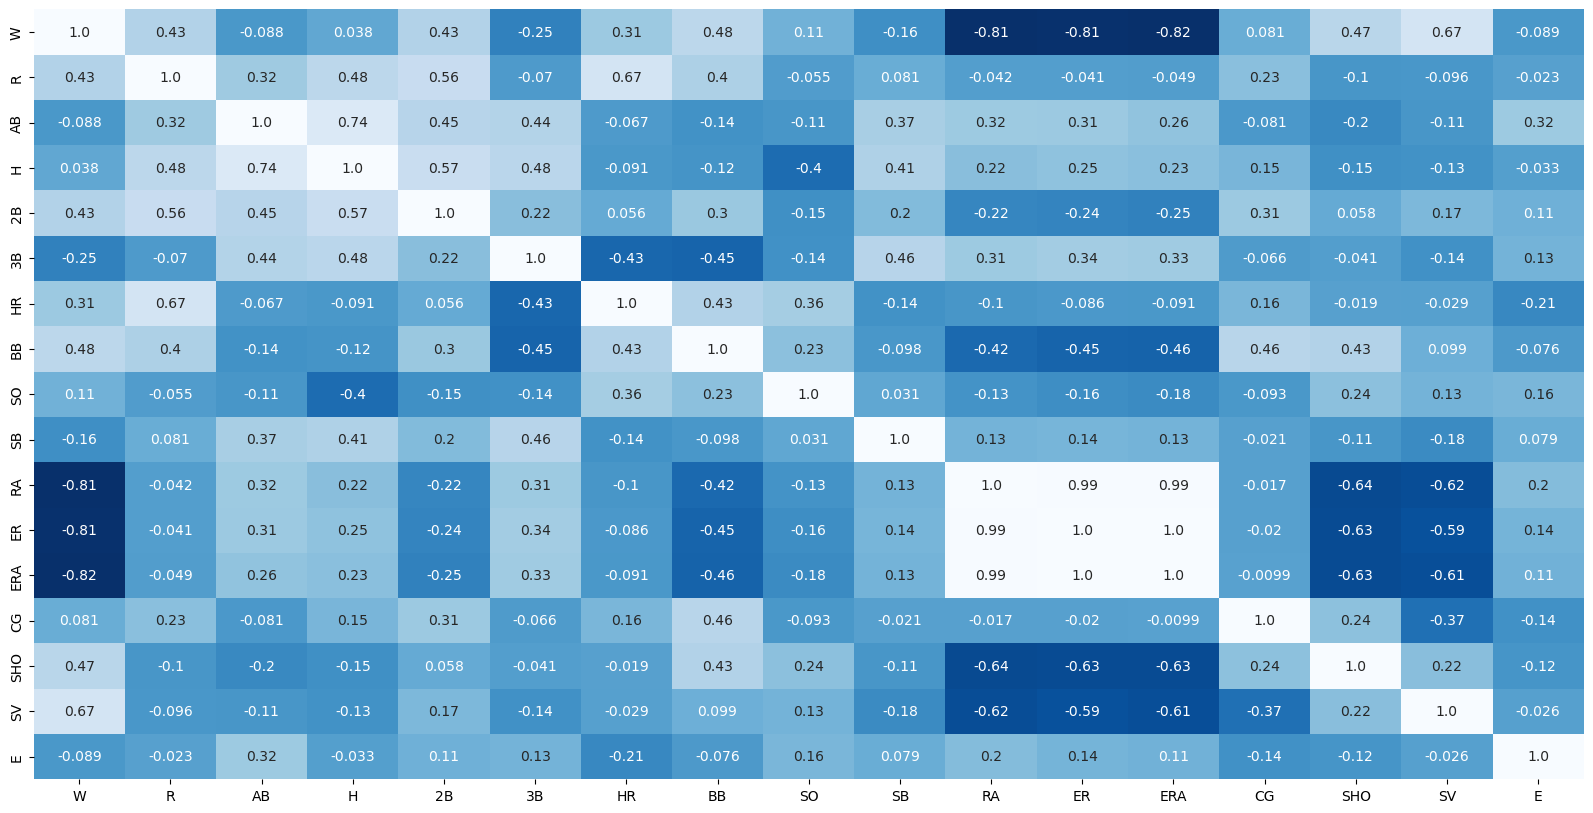

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(ball2.corr(),annot=True,fmt='.2',cbar=False,cmap='Blues_r')
ball2.corr()

In [102]:
X=ball2.drop('W',axis=1)
y=ball2['W']
key=X.keys()
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [103]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64